In [1]:
from Prototype.qpu_generators.arbitrary_connectivity_qpu_generator import ArbitraryConnectivityQPUGenerator
from Prototype.crystals.crystal_structure import CrystalStructure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crystal = CrystalStructure.from_file("../../native_crystal_database/hexagon_three.dat")

qpuGenerator = ArbitraryConnectivityQPUGenerator(
    weights_detuning_fraction=0.1,
    copy_gadget_detuning_correction=0.01,
    next_nearest_neighbour_detuning_correction=0.01,
    two_species_penalty = 0.3,
    no_species_penalty = 0.3,
    crystal=crystal,
    atomic_min_distance=1
)

result = qpuGenerator.convert()

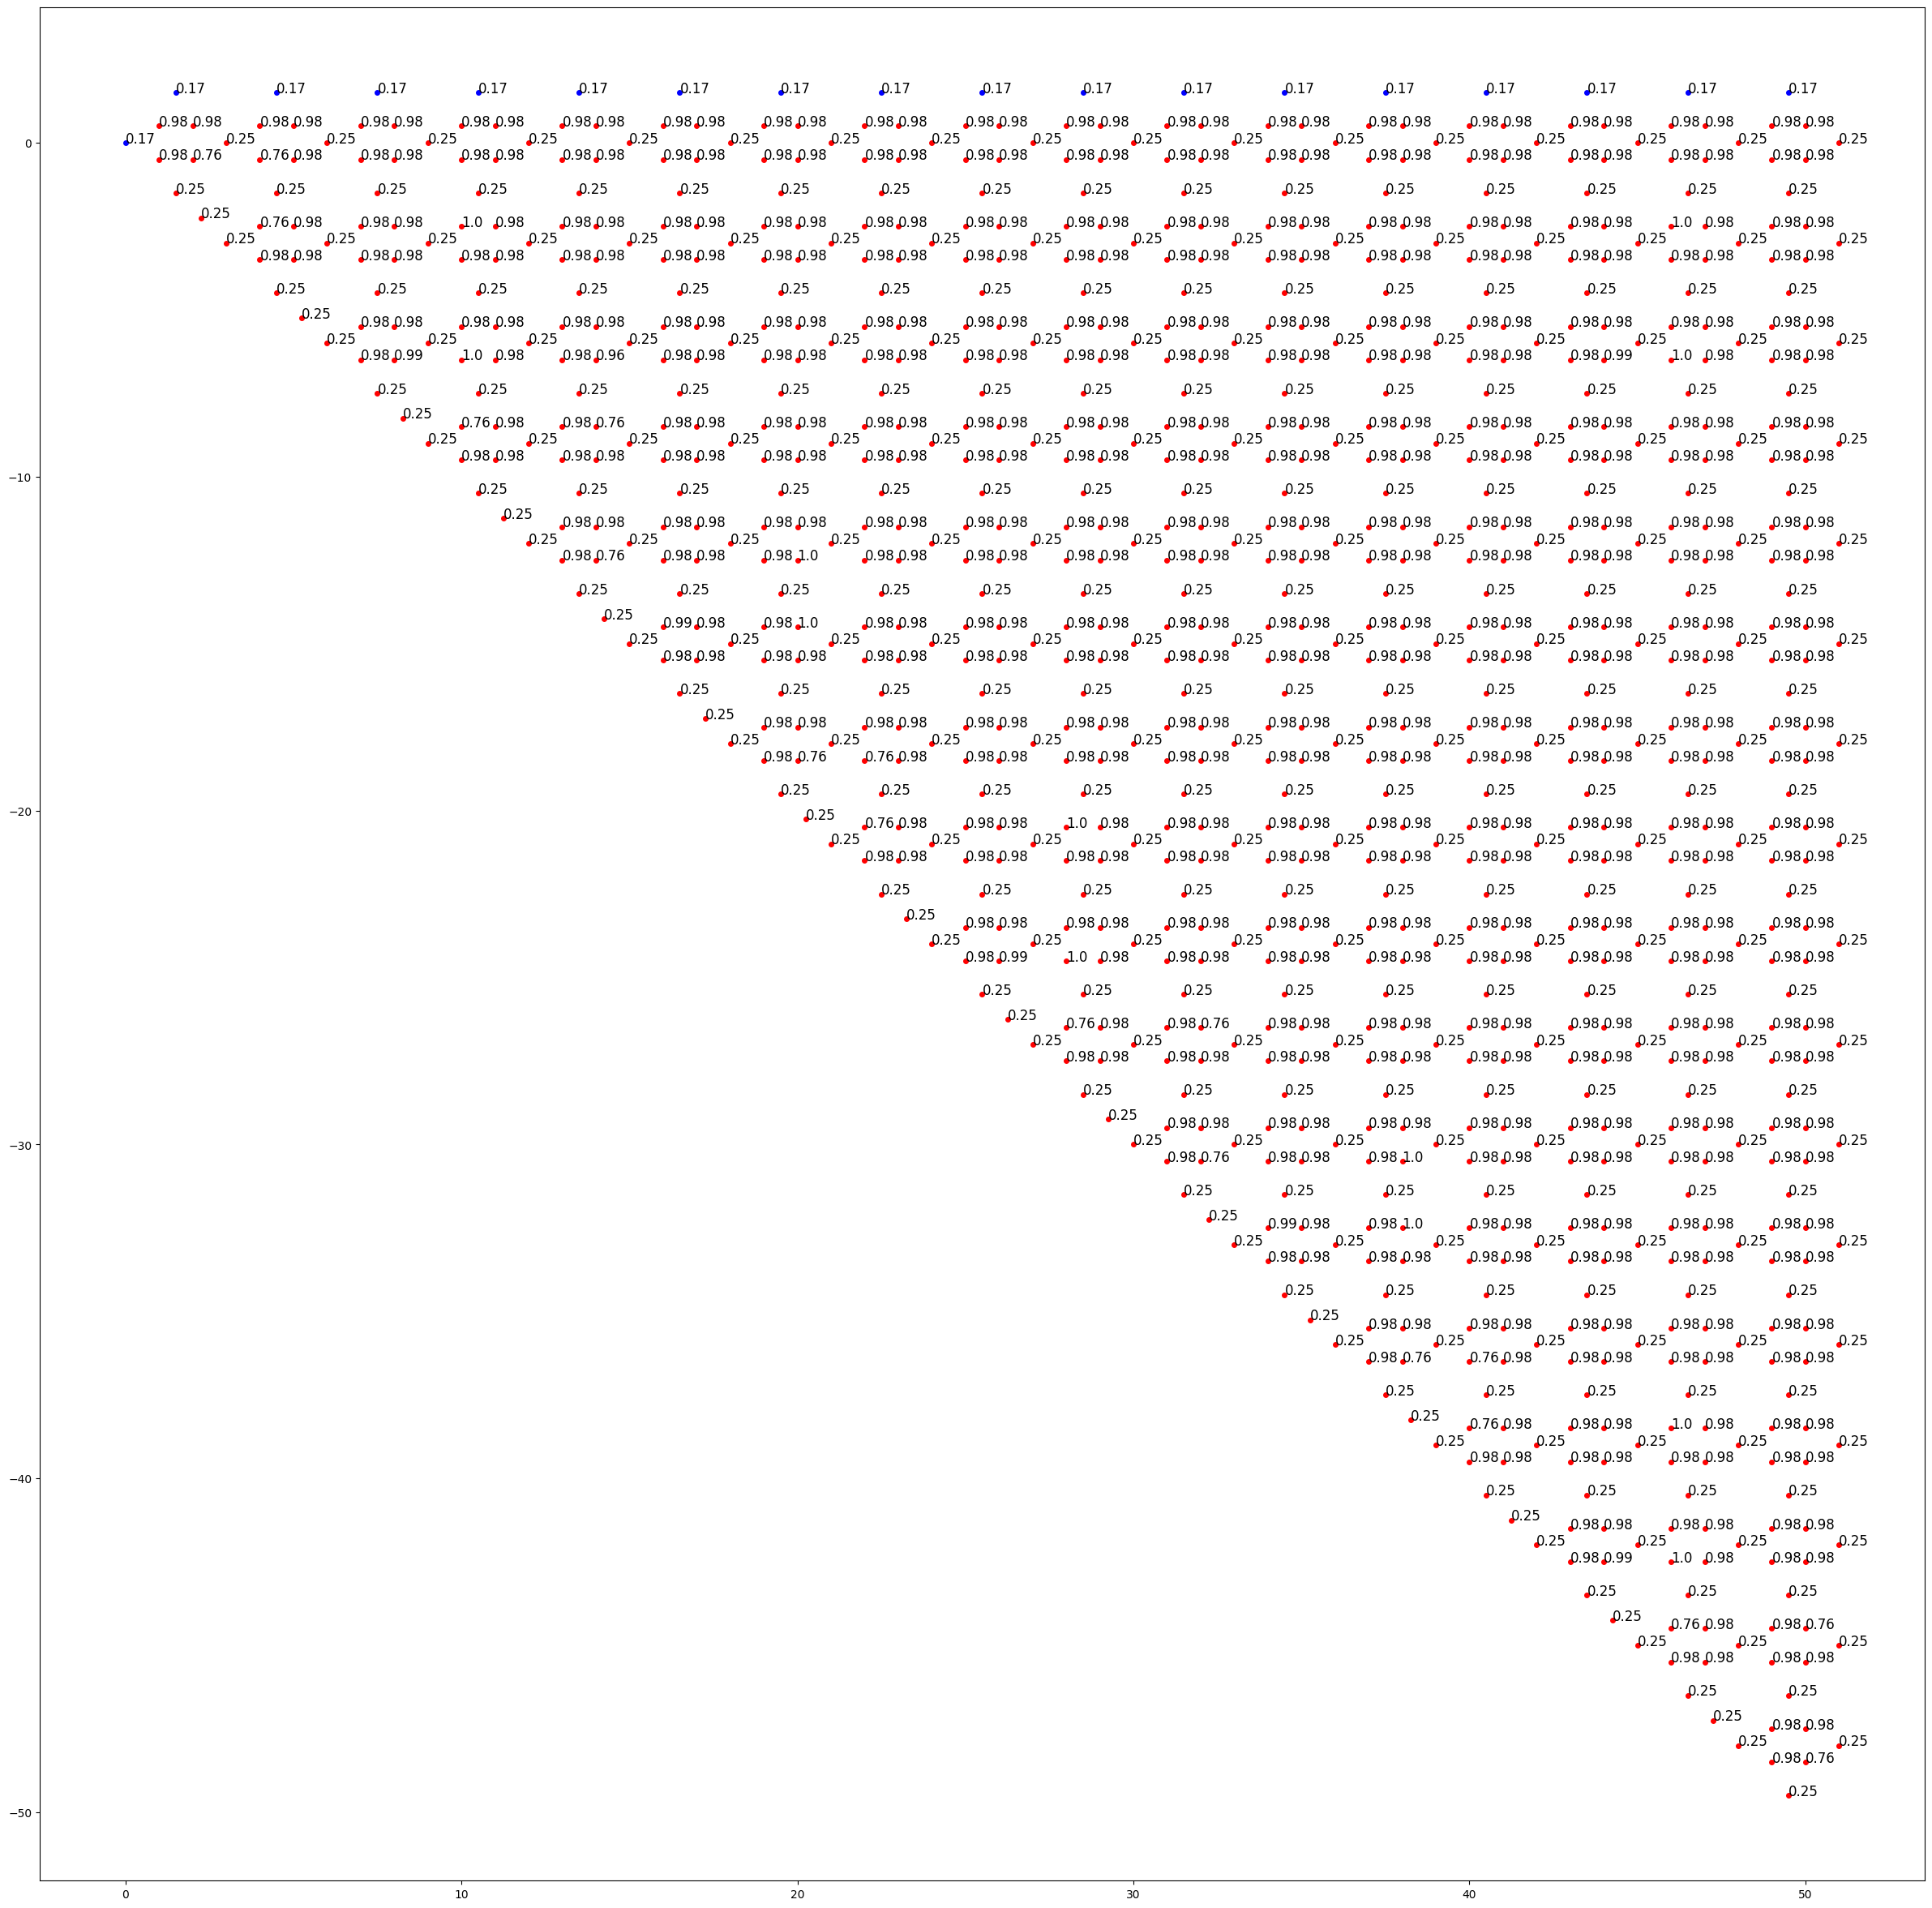

In [3]:
plt.subplots(1, 1, figsize=(30, 30))

atom_specs = result["atom_specs"]
for i in range(len(atom_specs)):
    plt.plot(
        atom_specs[i].getPosition()[0],
        atom_specs[i].getPosition()[1],
        marker = "o",
        markersize = 4,
        color = "red" if atom_specs[i].target == -1 else "blue"
    )
    plt.text(
        atom_specs[i].getPosition()[0],
        atom_specs[i].getPosition()[1],
        str(round(atom_specs[i].getDetuning(), 2)),
        fontdict = {
            "size": 12
        }
    )
plt.show()